In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


## Load data

In [2]:
features = ['id','cycle','setting1','setting2','setting3','s1','s2', 
            's3', 's4','s5', 's6',  's7', 's8', 's9','s10', 
            's11', 's12', 's13', 's14', 's15',  's16',
            's17', 's18', 's19',  's20', 's21']
datatrain = pd.read_csv('data/train.csv')
datatest = pd.read_csv('data/test.csv')
RUL = datatest['ttf']

## view statistics

In [3]:
datatrain[features].head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
datatest[features].head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,521.79,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,521.74,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,520.83,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,521.88,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,521.00,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117


In [5]:
datatrain[features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [6]:
datatrain[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  float64
 5   s1        20631 non-null  float64
 6   s2        20631 non-null  float64
 7   s3        20631 non-null  float64
 8   s4        20631 non-null  float64
 9   s5        20631 non-null  float64
 10  s6        20631 non-null  float64
 11  s7        20631 non-null  float64
 12  s8        20631 non-null  float64
 13  s9        20631 non-null  float64
 14  s10       20631 non-null  float64
 15  s11       20631 non-null  float64
 16  s12       20631 non-null  float64
 17  s13       20631 non-null  float64
 18  s14       20631 non-null  float64
 19  s15       20631 non-null  float64
 20  s16       20631 non-null  fl

In [7]:
RUL.head()

0    112
1     98
2     69
3     82
4     91
Name: ttf, dtype: int64

## removed flat lines

In [8]:
col_names = ['id','cycle','setting1','setting2','s2', 's3', 's4', 's6',  's7', 's8', 's9',
            's11', 's12', 's13', 's14', 's15',  's17',   's20', 's21']
data_train = datatrain[col_names]
data_test = datatest[col_names]

data_train.columns = col_names
data_test.columns = col_names

## data visualization

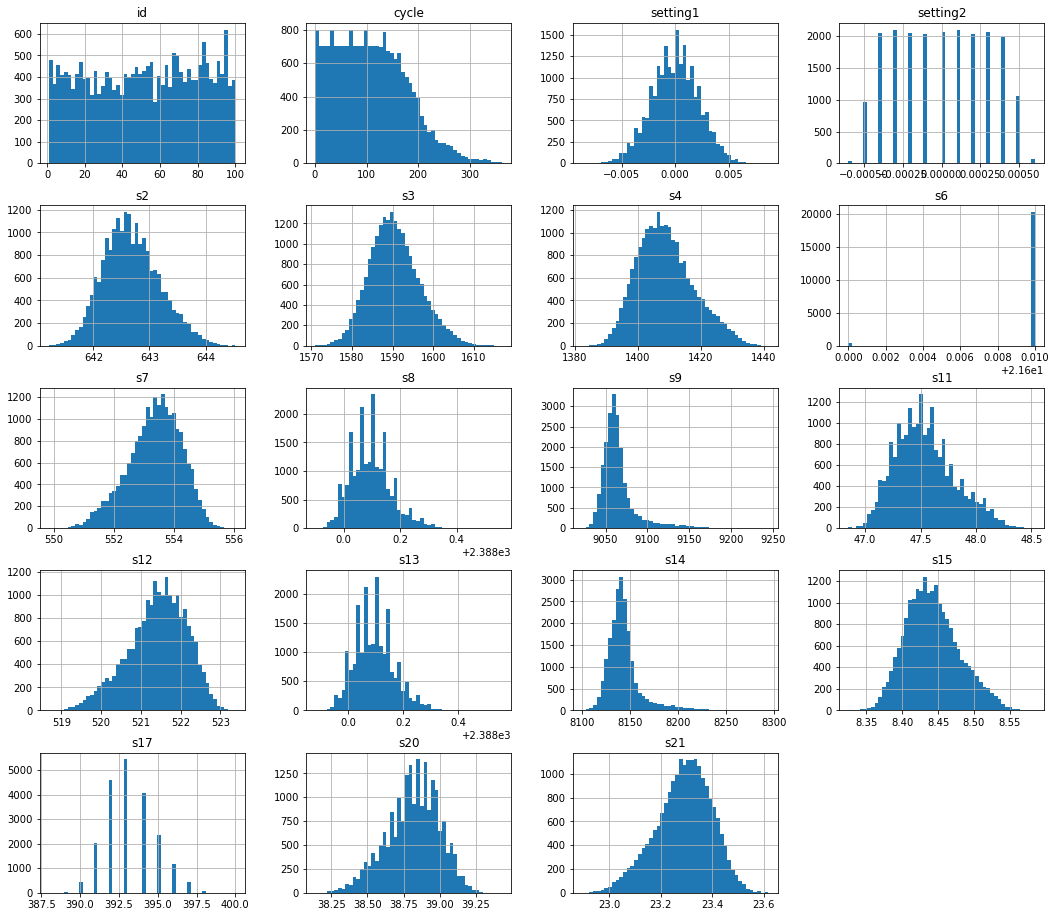

In [9]:
data_train.hist(bins=50, figsize=(18,16))
plt.show()

In [10]:
cyclestrain = data_train.groupby('id', as_index=False)['cycle'].max()
cyclestest = data_test.groupby('id', as_index=False)['cycle'].max()

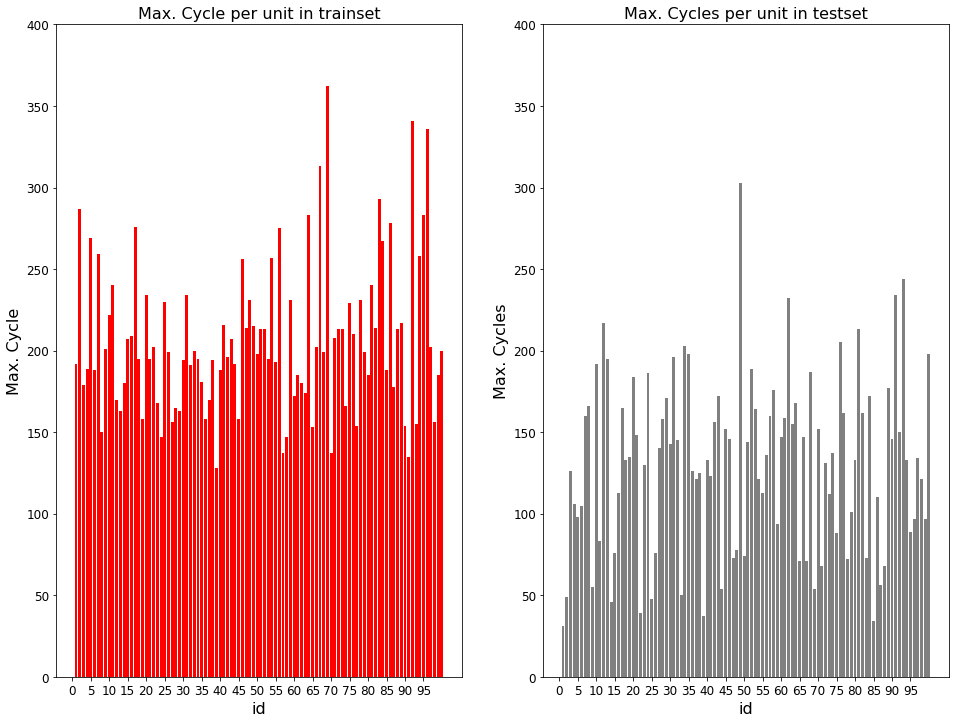

In [11]:
fig = plt.figure(figsize = (16,12))
fig.add_subplot(1,2,1)
bar_labels = list(cyclestrain['id'])
bars = plt.bar(list(cyclestrain['id']), cyclestrain['cycle'], color='red')
plt.ylim([0, 400])
plt.xlabel('id', fontsize=16)
plt.ylabel('Max. Cycle', fontsize=16)
plt.title('Max. Cycle per unit in trainset', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
fig.add_subplot(1,2,2)
bars = plt.bar(list(cyclestest['id']), cyclestest['cycle'], color='grey')
plt.ylim([0, 400])
plt.xlabel('id', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)
plt.title('Max. Cycles per unit in testset', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

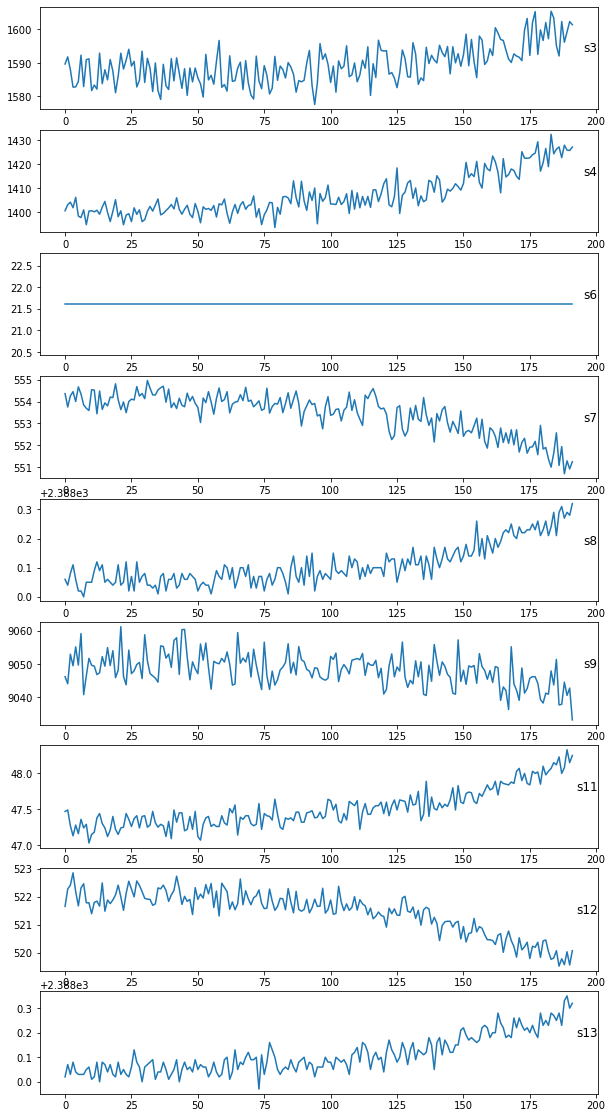

In [12]:
values = data_train[data_train.id==1].values
groups = [5, 6, 7, 8, 9, 10, 11,12,13]
i = 1
plt.figure(figsize=(10,20))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(data_train.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

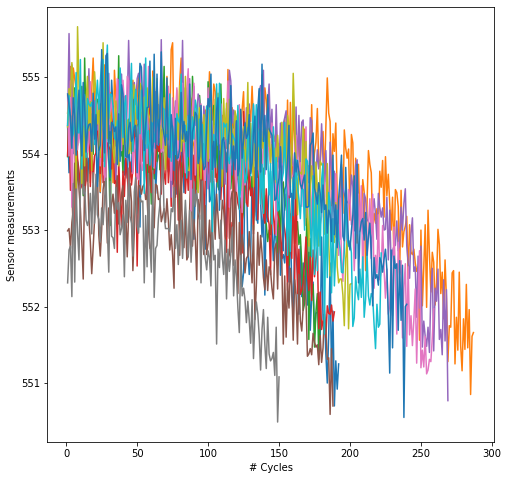

In [13]:
plt.figure(figsize = (8, 8))
plt.plot(data_train[data_train.id==1].cycle, data_train[data_train.id==1].s7)
plt.plot(data_train[data_train.id==2].cycle, data_train[data_train.id==2].s7)
plt.plot(data_train[data_train.id==3].cycle, data_train[data_train.id==3].s7)
plt.plot(data_train[data_train.id==4].cycle, data_train[data_train.id==4].s7)
plt.plot(data_train[data_train.id==5].cycle, data_train[data_train.id==5].s7)
plt.plot(data_train[data_train.id==6].cycle, data_train[data_train.id==6].s7)
plt.plot(data_train[data_train.id==7].cycle, data_train[data_train.id==7].s7)
plt.plot(data_train[data_train.id==8].cycle, data_train[data_train.id==8].s7)
plt.plot(data_train[data_train.id==9].cycle, data_train[data_train.id==9].s7)
plt.plot(data_train[data_train.id==10].cycle, data_train[data_train.id==10].s7)
plt.plot(data_train[data_train.id==11].cycle, data_train[data_train.id==11].s7)

plt.xlabel('# Cycles')
plt.ylabel('Sensor measurements')
plt.show()

In [14]:
minb = data_train.groupby('id', as_index=False).min().head(10)
maxb = data_train.groupby('id', as_index=False).max().head(10)
mmtable = minb.append(maxb, ignore_index=True)

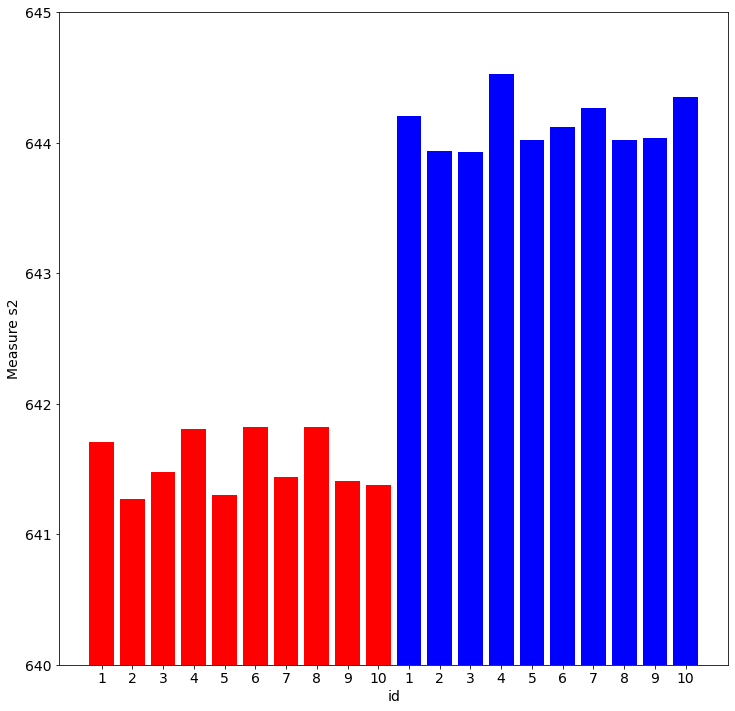

In [15]:
plt.figure(figsize = (12,12))
col = np.concatenate((np.repeat('red', 10), np.repeat('blue', 10)), axis=0)
bar_labels = list(mmtable['id'])
x_pos = list(range(len(bar_labels)))
bars = plt.bar(x_pos, mmtable['s2'], color=col)
plt.ylim([640, 645])
plt.xlabel('id', fontsize=14)
plt.ylabel('Measure s2', fontsize=14)
plt.xticks(x_pos, bar_labels, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Establishing remaining life in cycles

In [16]:
data_train = pd.merge(data_train, data_train.groupby('id', as_index=False)['cycle'].max(), how='left', on='id')


In [17]:
data_train.rename(columns={"cycles_x": "cycle", "cycles_y": "maxcycles"}, inplace=True)

In [18]:
data_train['TTF'] = data_train['cycle_y'] - data_train['cycle_x']

## scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
data_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,20631.0,51.506568,29.227633,1.0000,26.0000,52.0000,77.0000,100.0000
cycle_x,20631.0,108.807862,68.880990,1.0000,52.0000,104.0000,156.0000,362.0000
setting1,20631.0,-0.000009,0.002187,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting2,20631.0,0.000002,0.000293,-0.0006,-0.0002,0.0000,0.0003,0.0006
s2,20631.0,642.680934,0.500053,641.2100,642.3250,642.6400,643.0000,644.5300
s3,20631.0,1590.523119,6.131150,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s4,20631.0,1408.933782,9.000605,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s6,20631.0,21.609803,0.001389,21.6000,21.6100,21.6100,21.6100,21.6100
s7,20631.0,553.367711,0.885092,549.8500,552.8100,553.4400,554.0100,556.0600
s8,20631.0,2388.096652,0.070985,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600


In [21]:
ntrain = data_train.copy()

In [22]:
ntrain.iloc[:,2:19] = scaler.fit_transform(ntrain.iloc[:,2:19])

In [23]:
ntrain.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,20631.0,51.506568,29.227633,1.0,26.000000,52.000000,77.000000,100.0
cycle_x,20631.0,108.807862,68.880990,1.0,52.000000,104.000000,156.000000,362.0
setting1,20631.0,0.499490,0.125708,0.0,0.413793,0.500000,0.586207,1.0
setting2,20631.0,0.501959,0.244218,0.0,0.333333,0.500000,0.750000,1.0
s2,20631.0,0.443052,0.150618,0.0,0.335843,0.430723,0.539157,1.0
s3,20631.0,0.424746,0.133664,0.0,0.331807,0.415522,0.508829,1.0
s4,20631.0,0.450435,0.151935,0.0,0.339467,0.435348,0.545324,1.0
s6,20631.0,0.980321,0.138898,0.0,1.000000,1.000000,1.000000,1.0
s7,20631.0,0.566459,0.142527,0.0,0.476651,0.578100,0.669887,1.0
s8,20631.0,0.297957,0.107554,0.0,0.227273,0.287879,0.363636,1.0


In [24]:
ntest = data_test.copy()
ntest

,id,cycle,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,1,31,-0.0006,0.0004,642.58,1581.22,1398.91,21.61,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552
1,2,49,0.0018,-0.0001,642.55,1586.59,1410.83,21.61,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618
2,3,126,-0.0016,0.0004,642.88,1589.75,1418.89,21.61,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740
3,4,106,0.0012,0.0004,642.78,1594.53,1406.88,21.61,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581
4,5,98,-0.0013,-0.0004,642.27,1589.94,1419.36,21.61,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,97,-0.0006,0.0003,642.30,1590.88,1397.94,21.61,553.99,2388.03,9062.41,47.14,522.30,2388.01,8148.24,8.4110,391,38.96,23.4606
96,97,134,0.0013,-0.0001,642.59,1582.96,1410.92,21.61,554.05,2388.06,9076.36,47.38,521.58,2388.06,8155.48,8.4500,395,38.61,23.2953
97,98,121,0.0017,0.0001,642.68,1599.51,1415.47,21.61,553.44,2388.13,9062.34,47.66,521.53,2388.09,8146.39,8.4235,394,38.76,23.3608
98,99,97,0.0047,-0.0000,642.00,1585.03,1397.98,21.61,554.75,2388.01,9067.16,47.26,521.82,2388.02,8150.38,8.4003,391,38.95,23.3595


In [25]:
pd.DataFrame(ntest.columns).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,id,cycle,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21


In [26]:
ntest.iloc[:,2:19] = scaler.transform(ntest.iloc[:,2:19])

In [27]:
ntest.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,100.0,50.500000,29.011492,1.000000,25.750000,50.500000,75.250000,100.000000
cycle,100.0,130.960000,53.593479,31.000000,88.750000,133.500000,164.250000,303.000000
setting1,100.0,0.495805,0.135217,0.160920,0.405172,0.485632,0.574713,0.936782
setting2,100.0,0.518333,0.255297,0.083333,0.250000,0.583333,0.750000,0.916667
s2,100.0,0.469398,0.133913,0.162651,0.385542,0.471386,0.546687,0.849398
s3,100.0,0.453122,0.144894,0.128406,0.348103,0.443100,0.572051,0.795945
s4,100.0,0.477687,0.145617,0.119514,0.365674,0.473498,0.585289,0.779372
s6,100.0,0.990000,0.100000,0.000000,1.000000,1.000000,1.000000,1.000000
s7,100.0,0.531224,0.141754,0.165862,0.439211,0.550725,0.625604,0.840580
s8,100.0,0.331970,0.098030,0.136364,0.272727,0.318182,0.393939,0.590909


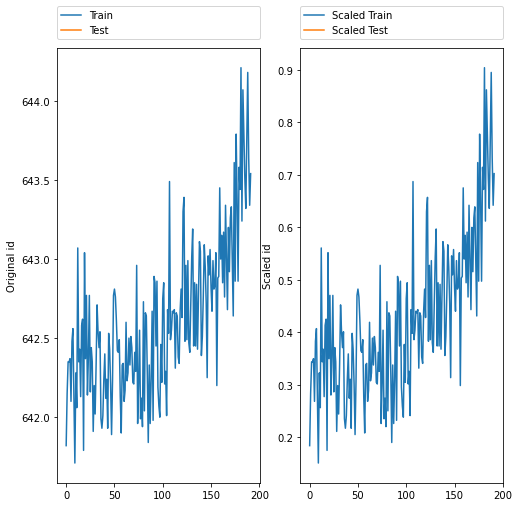

In [28]:
fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(data_train[data_train.id==1].s2)
plt.plot(data_test[data_test.id==1].s2)
plt.legend(['Train','Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original id')
fig.add_subplot(1,2,2)
plt.plot(ntrain[ntrain.id==1].s2)
plt.plot(ntest[ntest.id==1].s2)
plt.legend(['Scaled Train','Scaled Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled id')
plt.show()

## Fraction time to failure

In [29]:
def fractionTTF(dat,q):
    return(dat.TTF[q]-dat.TTF.min()) / float(dat.TTF.max()-dat.TTF.min())

In [30]:
fTTFz = []
fTTF = []

for i in range(data_train['id'].min(),data_train['id'].max()+1):
    dat=data_train[data_train.id==i]
    dat = dat.reset_index(drop=True)
    for q in range(len(dat)):
        fTTFz = fractionTTF(dat, q)
        fTTF.append(fTTFz)
ntrain['fTTF'] = fTTF

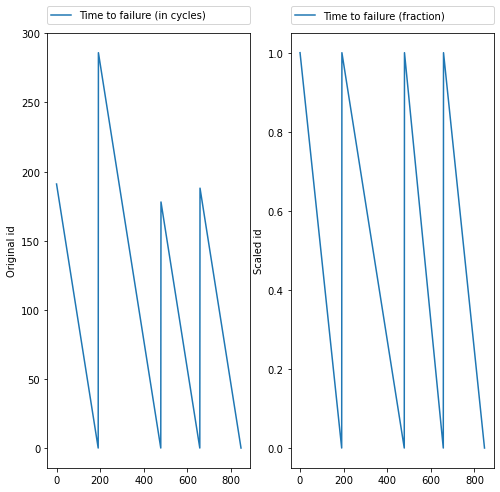

In [31]:
mx = cyclestrain.iloc[0:4,1].sum()

fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(ntrain.TTF[0:mx])
plt.legend(['Time to failure (in cycles)'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original id')
fig.add_subplot(1,2,2)
plt.plot(ntrain.fTTF[0:mx])
plt.legend(['Time to failure (fraction)'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled id')
plt.show()

In [32]:
ntrain['fTTF'].describe()

count    20631.000000
mean         0.500000
std          0.290085
min          0.000000
25%          0.248718
50%          0.500000
75%          0.751282
max          1.000000
Name: fTTF, dtype: float64

In [33]:
pd.DataFrame(ntrain.columns).transpose()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,id,cycle_x,setting1,setting2,s2,s3,s4,s6,s7,s8,...,s12,s13,s14,s15,s17,s20,s21,cycle_y,TTF,fTTF


In [34]:
X_train = ntrain.values[:,1:19]
Y_train = ntrain.values[:, 21]
X_test = ntest.values[:,1:19]


## Model regression

In [35]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train)
y_pred = regression.predict(X_test)
y_pred

array([ 0.81160078,  0.69239191,  0.40917907,  0.48892861,  0.534232  ,
        0.52307426,  0.39806201,  0.30836563,  0.65897226,  0.27721048,
        0.54774934,  0.20829679,  0.2409736 ,  0.6841108 ,  0.68115894,
        0.5400873 ,  0.30488071,  0.37769819,  0.45371671,  0.13271223,
        0.41117976,  0.75384095,  0.52243818,  0.15970011,  0.72421835,
        0.66646524,  0.44392959,  0.35985386,  0.35239733,  0.38304119,
        0.07984344,  0.39866247,  0.66610517,  0.04703261,  0.04874729,
        0.32148286,  0.41137401,  0.38099684,  0.80042697,  0.30808761,
        0.42359474,  0.23300882,  0.26976804,  0.67425152,  0.32962287,
        0.32235183,  0.62029672,  0.60020147, -0.21074118,  0.63660797,
        0.4166556 ,  0.17634512,  0.24237219,  0.57548042,  0.54644324,
        0.28537094,  0.34419691,  0.22819474,  0.64327469,  0.40441274,
        0.26043633,  0.11748387,  0.31434402,  0.252651  ,  0.72204882,
        0.21706157,  0.66957247,  0.10753866,  0.69384844,  0.37

In [36]:
print(y_pred.min(), y_pred.max())

-0.21074117636669554 0.8116007763256298


In [37]:
data_test = pd.merge(data_test, data_test.groupby('id', as_index=False)['cycle'].max(), how='left', on='id')

In [38]:
data_test.rename(columns={"cycles_x": "cycle", "cycle_y": "maxcycles"}, inplace=True)

In [39]:
data_test['score'] = y_pred

In [40]:
data_test.head()

,id,cycle_x,setting1,setting2,s2,s3,s4,s6,s7,s8,...,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles,score
0,1,31,-0.0006,0.0004,642.58,1581.22,1398.91,21.61,554.42,2388.08,...,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552,31,0.811601
1,2,49,0.0018,-0.0001,642.55,1586.59,1410.83,21.61,553.52,2388.10,...,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618,49,0.692392
2,3,126,-0.0016,0.0004,642.88,1589.75,1418.89,21.61,552.59,2388.16,...,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740,126,0.409179
3,4,106,0.0012,0.0004,642.78,1594.53,1406.88,21.61,552.64,2388.13,...,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581,106,0.488929
4,5,98,-0.0013,-0.0004,642.27,1589.94,1419.36,21.61,553.29,2388.10,...,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117,98,0.534232


In [41]:
def totcycles(data):
    return(data['cycle_x'] / (1-data['score']))
    
data_test['maxpredcycles'] = totcycles(data_test)

In [42]:
data_test['maxpredcycles'].head()

0    164.544202
1    159.293602
2    213.262588
3    207.407422
4    210.405180
Name: maxpredcycles, dtype: float64

In [43]:
def RULfunction(data):
    return(data['maxpredcycles'] - data['maxcycles'])

data_test['RUL'] = RULfunction(data_test)

In [44]:
predictedRUL = data_test['RUL']
predictedRUL[0:10]

0    133.544202
1    110.293602
2     87.262588
3    101.407422
4    112.405180
5    115.160060
6    105.808109
7     74.011206
8    106.277202
9     73.637499
Name: RUL, dtype: float64

In [45]:
len(predictedRUL)

100

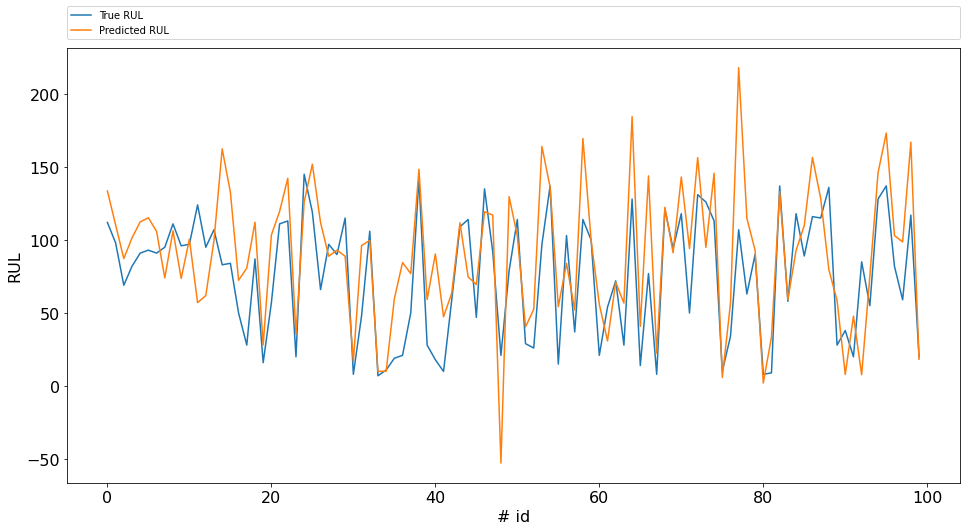

In [46]:
plt.figure(figsize = (16, 8))
plt.plot(RUL)
plt.plot(predictedRUL)
plt.xlabel('# id', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('RUL', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['True RUL','Predicted RUL'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.show()

In [50]:
du = predictedRUL - RUL
df2 = pd.DataFrame({'reality': RUL, 'predict': predictedRUL,'difference':du})
df2.head(10)

,reality,predict,difference
0,112,133.544202,21.544202
1,98,110.293602,12.293602
2,69,87.262588,18.262588
3,82,101.407422,19.407422
4,91,112.405180,21.405180
5,93,115.160060,22.160060
6,91,105.808109,14.808109
7,95,74.011206,-20.988794
8,111,106.277202,-4.722798
9,96,73.637499,-22.362501


In [48]:
xpredictedRUL = list(round(x) for x in predictedRUL)
opredictedRUL = []

for i in range(0,len(xpredictedRUL)):
    opredictedRUL = np.concatenate((opredictedRUL, list(reversed(np.arange(xpredictedRUL[i])))))

In [83]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(RUL, xpredictedRUL)
print ('MSE on train set:',mse_test)
rmse_test = np.sqrt(mean_squared_error(RUL, xpredictedRUL))
print ('RMSE on train set:',rmse_test)

MSE on train set: 1213.52
RMSE on train set: 34.83561396042848
